In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import las
import lasio

In [ ]:
#Loading datasets
marker = pd.read_csv('/content/drive/MyDrive/Dataset/marker_24.csv', sep=';')

Well_1 = lasio.read('/content/drive/MyDrive/Dataset/Hamilton 24.las')

Well_2 = las.LASReader('/content/drive/MyDrive/Dataset/Hamilton 26.las').data

In [ ]:
marker

,Formation,Top
0,Marker G2 Bed,214
1,Marker L2 Bed,241
2,Marker D1 Bed,323
3,3 Finger Bed,351
4,Marker M1 Bed,397
5,Marker M1A Bed,419
6,Marker M2 Bed,438
7,Marker M3 Bed,461
8,Marker M4 Bed,485
9,Hutchinson Salt Member,514


In [ ]:
# Convert Las Files to Dataframe
well1 = Well_1.df().replace(-999.25, np.nan).reset_index('DEPT')
well2 = pd.DataFrame(Well_2).replace(-999.25, np.nan)

In [ ]:
well1

,DEPT,GR,NEU
0,0.0,9.724,-1409.206
1,0.5,8.722,98.991
2,1.0,8.120,149.433
3,1.5,9.925,192.308
4,2.0,14.236,197.352
...,...,...,...
1716,858.0,24.300,903.531
1717,858.5,25.000,901.009
1718,859.0,21.900,974.149
1719,859.5,17.000,1138.083


In [ ]:
well2

,DEPT,GR,NEU
0,0.0,105.522,754.822
1,0.5,99.552,754.822
2,1.0,99.801,764.975
3,1.5,99.801,767.513
4,2.0,97.811,764.975
...,...,...,...
1716,858.0,17.018,1108.432
1717,858.5,15.263,1196.965
1718,859.0,15.514,1265.261
1719,859.5,16.767,1298.145


**Visualising the wells data**

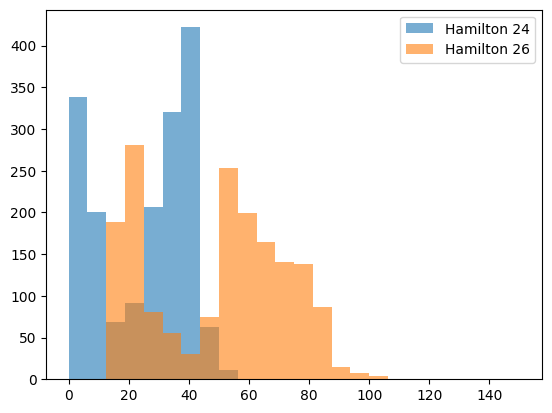

In [ ]:
#intersect between two well
plt.hist(well1.GR, bins=np.linspace(0,150,25), alpha=0.6, label = 'Hamilton 24')
plt.hist(well2.GR, bins=np.linspace(0,150,25), alpha=0.6, label = 'Hamilton 26')
plt.legend()

# Both well have different Distrubition so we need to make normalize to the data

In [ ]:
well1['GR_nor'] = (well1.GR - np.min(well1.GR)) / (np.max(well1.GR) - np.min(well1.GR))
well2['GR_nor'] = (well2.GR - np.min(well2.GR)) / (np.max(well2.GR) - np.min(well2.GR))

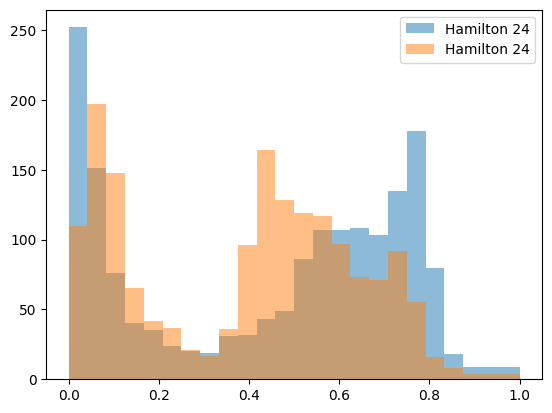

In [ ]:
#intersect between two well after normalization
plt.hist(well1.GR_nor, bins=np.linspace(0,1,25), alpha=0.5, label = 'Hamilton 24')
plt.hist(well2.GR_nor, bins=np.linspace(0,1,25), alpha=0.5, label = 'Hamilton 24')
plt.legend()

In [ ]:
marker.items

<bound method DataFrame.items of                  Formation  Top
0            Marker G2 Bed  214
1            Marker L2 Bed  241
2            Marker D1 Bed  323
3             3 Finger Bed  351
4            Marker M1 Bed  397
5           Marker M1A Bed  419
6            Marker M2 Bed  438
7            Marker M3 Bed  461
8            Marker M4 Bed  485
9   Hutchinson Salt Member  514
10          Marker S1A Bed  532
11           Marker S2 Bed  544
12           Marker S3 Bed  568
13           Marker S4 Bed  593>

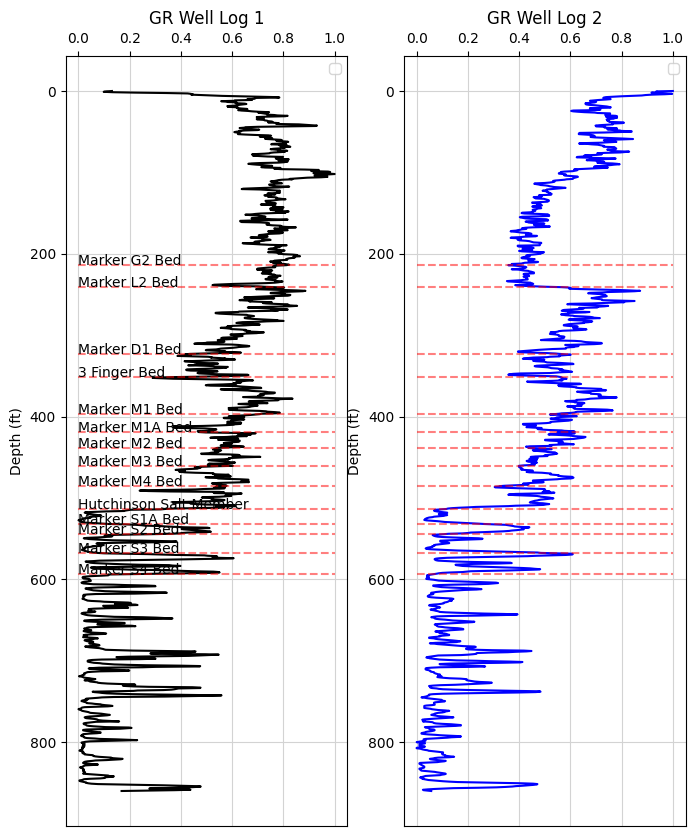

In [ ]:
# Plot the data
fig, axs = plt.subplots(ncols=2, figsize=(8, 10))

# Well Log Gr well 1
axs[0].plot(well1.GR_nor ,well1.DEPT, 'black')
axs[0].set_ylabel('Depth (ft)')
axs[0].set_title('GR Well Log 1')




# Well Log Gr well 2
axs[1].plot(well2.GR_nor ,well2.DEPT, 'Blue')
axs[1].set_ylabel('Depth (ft)')
axs[1].set_title('GR Well Log 2')
#plt.grid()
#plt.legend()
#plt.gca().invert_yaxis()


# Iterate over the values of the marker dictionary
for i in marker.values:
    # Draw a horizontal line at the depth of the marker on both well logs
    axs[0].hlines(i[1], 0, 1, 'red', linestyles='dashed', alpha=0.5)
    axs[1].hlines(i[1], 0, 1, 'red', linestyles='dashed', alpha=0.5)
    # Add the name of the marker at a fixed depth on the first well log
    axs[0].text(0, i[1], i[0], fontsize=10)



# Iterate over the axes objects
for ax in [axs[0], axs[1]]:
    # Set the y-axis to be inverted
    ax.invert_yaxis()

    # move x-axis ticks to top
    ax.xaxis.set_ticks_position('top') 

    # move x-axis ticks to top
    ax.xaxis.set_label_position('top') # move x-axis label to top

    # Add gridlines
    ax.grid(which='major', color='lightgrey', linestyle='-')
    
    # Add legend
    ax.legend(loc='upper right')
    



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


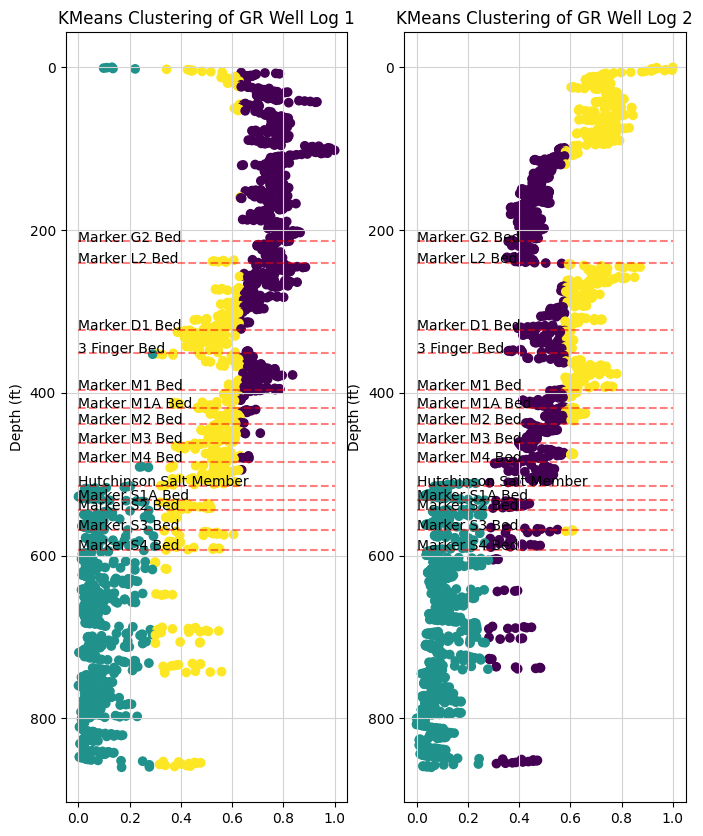

In [ ]:
# Import the KMeans module from the scikit-learn library for grouping similar data points together in a dataset
from sklearn.cluster import KMeans

# Create subsets of the data with only the Gamma Ray (GR) values
subset1 = well1[['GR_nor']]
subset2 = well2[['GR_nor']]

# Set the number of clusters to 3
n_clusters = 3

# Create a KMeans model and fit it to the data subsets
kmeans1 = KMeans(n_clusters=n_clusters, random_state=0).fit(subset1)
kmeans2 = KMeans(n_clusters=n_clusters, random_state=0).fit(subset2)

# Get the labels for each data point
labels1 = kmeans1.labels_
labels2 = kmeans2.labels_

# Add the labels to the original dataframes
well1['labels'] = labels1
well2['labels'] = labels2

# Plot the results
fig, axs = plt.subplots(ncols=2, figsize=(8, 10))

# Create a scatter plot for the first well log
axs[0].scatter(well1.GR_nor, well1.DEPT, c=well1.labels, cmap='viridis')
axs[0].set_ylabel('Depth (ft)')
axs[0].set_title('KMeans Clustering of GR Well Log 1')

# Create a scatter plot for the second well log
axs[1].scatter(well2.GR_nor, well2.DEPT, c=well2.labels, cmap='viridis')
axs[1].set_ylabel('Depth (ft)')
axs[1].set_title('KMeans Clustering of GR Well Log 2')

# Add the marker depths to the plots
for i in marker.values:
    axs[0].hlines(i[1], 0, 1, 'red', linestyles='dashed', alpha=0.5)
    axs[0].text(0, i[1], i[0], fontsize=10)
    axs[1].hlines(i[1], 0, 1, 'red', linestyles='dashed', alpha=0.5)
    axs[1].text(0, i[1], i[0], fontsize=10)

# Invert the y-axis and add gridlines
for ax in [axs[0], axs[1]]:
    ax.invert_yaxis()
    ax.grid(which='major', color='lightgrey', linestyle='-')


# Selecting Hutchinson Salt Member” in Hudson 24 well because it marked by abrupt change of GR_nor value.

In [ ]:
marker

,Formation,Top
0,Marker G2 Bed,214
1,Marker L2 Bed,241
2,Marker D1 Bed,323
3,3 Finger Bed,351
4,Marker M1 Bed,397
5,Marker M1A Bed,419
6,Marker M2 Bed,438
7,Marker M3 Bed,461
8,Marker M4 Bed,485
9,Hutchinson Salt Member,514


In [ ]:
# Depth of  Hutchinson Salt Member Fomration 
marker_depth = marker[marker['Formation'] == 'Hutchinson Salt Member'].Top.values[0]
marker_depth


514

In [ ]:
search_template = well1[(well1.DEPT>=marker_depth - 30) &(well1.DEPT<marker_depth + 30)].GR_nor.values
print(len(search_template))

120


#Matching and Scoring
Matching is a process that measure correlation coefficient between search_template with the data in Hudson 26 with row by row manner.

In [ ]:
score_index = np.array([])
score = np.array([])
for i in range(60, len(well2)-60):
 search_template_well2 = well2.GR_nor[i-60:i+60].values
 corr = np.corrcoef(search_template, search_template_well2)[0,1]
 score = np.append(score,corr)
 score_index = np.append(score_index,i)

#Ranking

Text(0.5, 0, 'Corr Coef Value')

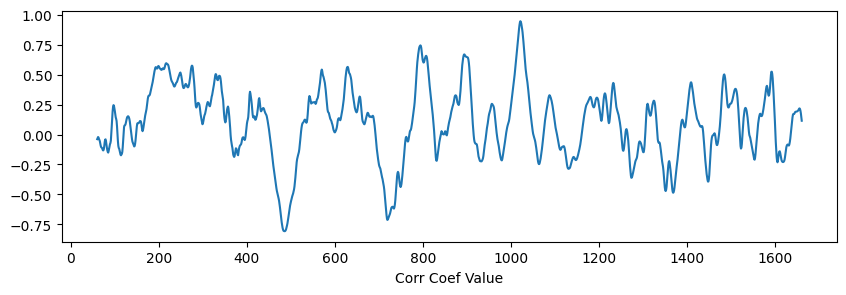

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(score_index, score)
plt.xlabel('Index Number')
plt.xlabel('Corr Coef Value')

In [ ]:
best_score_index = np.argmax(score)
best_depth_index = score_index[best_score_index]
dept = well2.loc[best_depth_index].DEPT
print('Depth of Hutchinson Salt Member in Hudson 26:', dept)

Depth of Hutchinson Salt Member in Hudson 26: 510.5


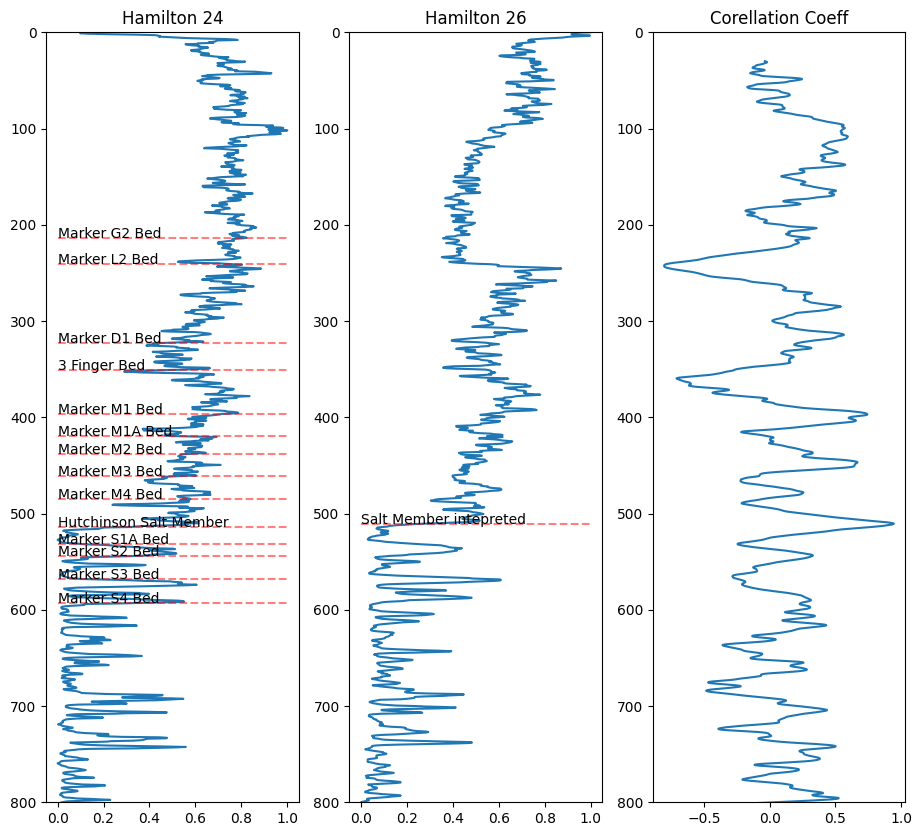

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.title('Hamilton 24')
plt.plot('GR_nor', 'DEPT', data=well1)
for i in marker.values:
    plt.hlines(i[1], 0, 1,'red',linestyles='dashed', alpha=0.5)
    plt.text(0, i[1],i[0])
plt.ylim(0,800)
plt.gca().invert_yaxis()
plt.subplot(142)
plt.title('Hamilton 26')
plt.plot('GR_nor', 'DEPT', data=well2)
plt.hlines(dept, 0, 1,'red',linestyles='dashed', alpha=0.5)
plt.text(0, dept,'Salt Member intepreted')
plt.ylim(0,800)
plt.gca().invert_yaxis()
plt.subplot(143)
plt.title('Corellation Coeff')
x = score
y = well2.loc[score_index,'DEPT']
plt.plot(x,y)
plt.ylim(0,800)
plt.gca().invert_yaxis()